In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("stream_classify.xlsx", index_col=0)
data.head(10)

,JSKR_LINKAGE_KEY,STREAM_PLACEMENT_DESC,GENDER,INDIGENOUS,HOMELESS,PWD,CALD,REFUGEE,EX_OFFENDER,AGE_GROUP,UE_GROUP,EDUCATION_ADJ,STREAM_TEMP
0,1,Stream A,Female,0,0,0,1,0,0,50 to 54 years,Under 12 Months,Degree,1
4,2,Stream C,Female,0,1,0,0,0,0,25 to 29 years,24 to 59 Months,Diploma,3
12,7,Stream C,Male,0,0,1,0,0,0,30 to 39 years,60+ Months,<Year 10,3
19,12,Stream C,Female,0,1,1,0,0,0,30 to 39 years,24 to 59 Months,Year 10/11,3
20,13,Stream A,Female,0,0,0,0,0,0,Under 22 years,Under 12 Months,Year 10/11,1
21,14,Stream C,Male,0,0,1,0,0,0,22 to 24 years,60+ Months,Non-trade vocational education,3
23,15,Stream B,Female,0,0,0,0,0,0,25 to 29 years,Under 12 Months,Non-trade vocational education,2
25,16,Stream C,Male,0,1,1,0,0,0,25 to 29 years,60+ Months,<Year 10,3
30,17,Stream C,Male,1,0,1,0,0,1,40 to 49 years,12 to 23 Months,Year 10/11,3
31,18,Stream A,Male,0,0,1,0,0,0,30 to 39 years,12 to 23 Months,Year 12/13,1


In [3]:
col = ['HOMELESS', 'PWD', 'REFUGEE', 'EX_OFFENDER', 'CALD']
data_to_split = data[col]
data_to_split.head(10)

,HOMELESS,PWD,REFUGEE,EX_OFFENDER,CALD
0,0,0,0,0,1
4,1,0,0,0,0
12,0,1,0,0,0
19,1,1,0,0,0
20,0,0,0,0,0
21,0,1,0,0,0
23,0,0,0,0,0
25,1,1,0,0,0
30,0,1,0,1,0
31,0,1,0,0,0


In [4]:
data_label = data["STREAM_TEMP"]
data_label.head(10)

0     1
4     3
12    3
19    3
20    1
21    3
23    2
25    3
30    3
31    1
Name: STREAM_TEMP, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data_to_split, data_label, test_size=0.05)

classifier = DecisionTreeClassifier(max_depth=5)

classifier = classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

In [7]:
print(f"Accuracy: {metrics.accuracy_score(Y_test, y_pred)}")

Accuracy: 0.4951232561010741


In [8]:
col_name = [col for col in data_to_split.columns]
print(col_name)

['HOMELESS', 'PWD', 'REFUGEE', 'EX_OFFENDER', 'CALD']


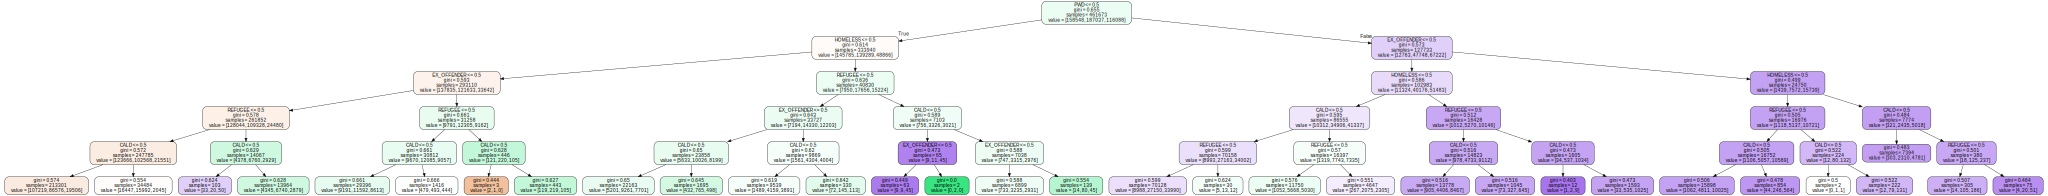

In [9]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=col_name,
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data, format="png")
graph